# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
from importlib import reload 
import matplotlib
matplotlib=reload(matplotlib)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
print(weather_api_key)


c8f02ea63201c6d84462a59548b22778


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests. get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | san antonio de pale
Processing Record 3 of Set 1 | keflavik
Processing Record 4 of Set 1 | anibare
City not found. Skipping...
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | banda aceh
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | pangody
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tamiahua
Processing Record 17 of Set 1 | taupo
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | don luan
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 

Processing Record 43 of Set 4 | qinhuangdao
Processing Record 44 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 45 of Set 4 | la passe
Processing Record 46 of Set 4 | belyy yar
Processing Record 47 of Set 4 | mudanya
Processing Record 48 of Set 4 | banyo
Processing Record 49 of Set 4 | negapatam
Processing Record 0 of Set 5 | merizo village
Processing Record 1 of Set 5 | viet tri
Processing Record 2 of Set 5 | tidjikja
Processing Record 3 of Set 5 | gemena
Processing Record 4 of Set 5 | monchegorsk
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | puerto armuelles
Processing Record 8 of Set 5 | pirajui
Processing Record 9 of Set 5 | kiunga
Processing Record 10 of Set 5 | sao joao da barra
Processing Record 11 of Set 5 | lompoc
Processing Record 12 of Set 5 | esperanza
Processing Record 13 of Set 5 | vilyuchinsk
Processing Record 14 of Set 5 | hamilton
Processing Record 15 of Set 5 | tahe
Processing Record

Processing Record 35 of Set 8 | port saint john's
Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | cable beach
City not found. Skipping...
Processing Record 38 of Set 8 | steamboat springs
Processing Record 39 of Set 8 | samamea
City not found. Skipping...
Processing Record 40 of Set 8 | essaouira
Processing Record 41 of Set 8 | ciudad lazaro cardenas
Processing Record 42 of Set 8 | hammerfest
Processing Record 43 of Set 8 | peniche
Processing Record 44 of Set 8 | tercan
Processing Record 45 of Set 8 | pangoa
Processing Record 46 of Set 8 | barranca
Processing Record 47 of Set 8 | katima mulilo
Processing Record 48 of Set 8 | adam
Processing Record 49 of Set 8 | kutum
Processing Record 0 of Set 9 | tucumcari
Processing Record 1 of Set 9 | ha'il
Processing Record 2 of Set 9 | suntar
Processing Record 3 of Set 9 | kataragama
City not found. Skipping...
Processing Record 4 of Set 9 | tarakan
Processing Record 5 of Set 9 | bijie
Processing Record 6 of Set 9 | terban

Processing Record 23 of Set 12 | dakhla
Processing Record 24 of Set 12 | dingcheng
Processing Record 25 of Set 12 | pontianak
Processing Record 26 of Set 12 | khilok
Processing Record 27 of Set 12 | grantsville
Processing Record 28 of Set 12 | moyynkum
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | changli
Processing Record 31 of Set 12 | erdemli
Processing Record 32 of Set 12 | hailar
Processing Record 33 of Set 12 | khodoriv
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,24.94,87,68,6.02,YE,1703128764
1,san antonio de pale,-1.4014,5.6325,26.55,80,97,1.77,GQ,1703129023
2,keflavik,64.0049,-22.5624,-1.05,69,75,11.32,IS,1703129023
3,bredasdorp,-34.5322,20.0403,14.58,83,0,0.69,ZA,1703128751
4,arraial do cabo,-22.9661,-42.0278,23.75,85,81,2.65,BR,1703129023


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,24.94,87,68,6.02,YE,1703128764
1,san antonio de pale,-1.4014,5.6325,26.55,80,97,1.77,GQ,1703129023
2,keflavik,64.0049,-22.5624,-1.05,69,75,11.32,IS,1703129023
3,bredasdorp,-34.5322,20.0403,14.58,83,0,0.69,ZA,1703128751
4,arraial do cabo,-22.9661,-42.0278,23.75,85,81,2.65,BR,1703129023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

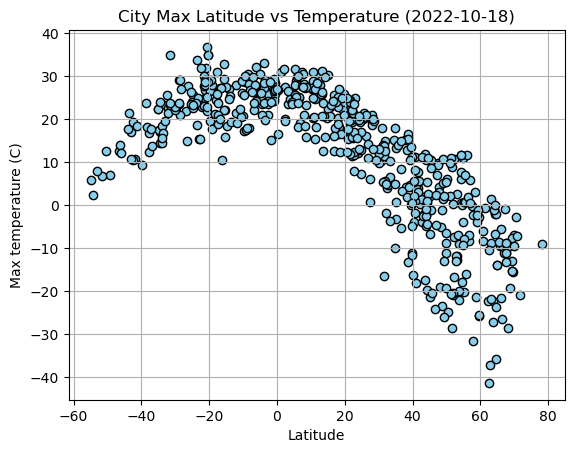

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black", facecolor="skyblue")


# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.ylabel("Max temperature (C)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot

plt.show()

#### Latitude Vs. Humidity

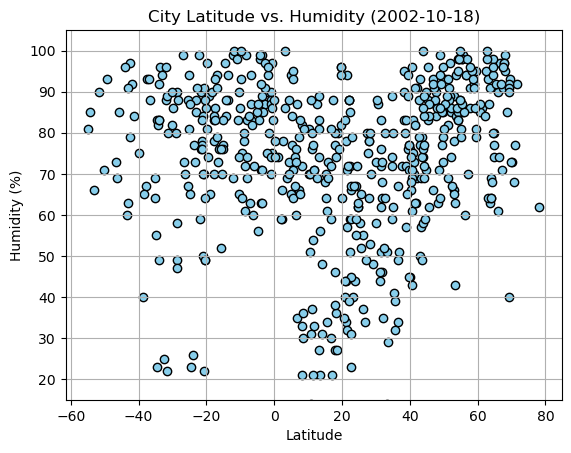

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Humidity (2002-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude") 
plt.ylim(15,105)
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

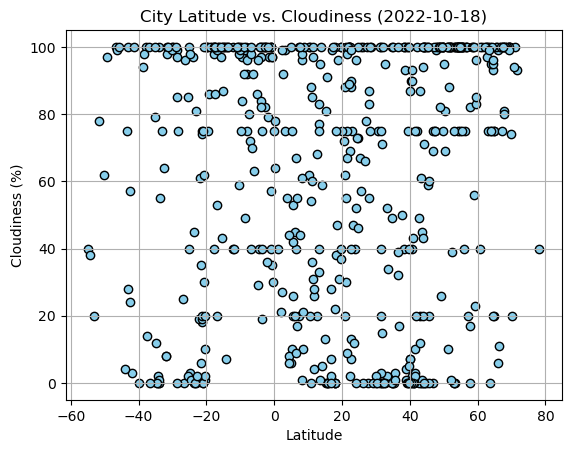

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude") 
plt.grid(True,)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

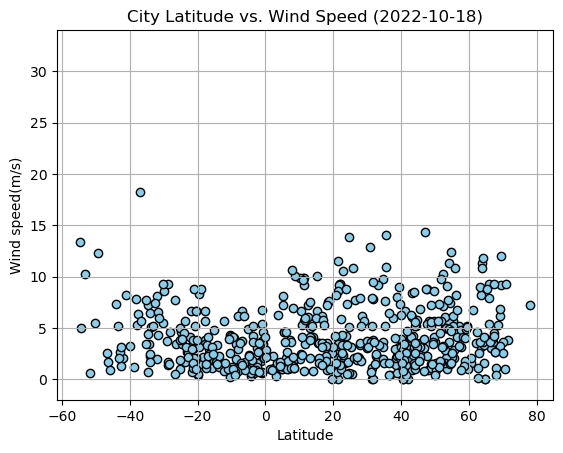

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind speed(m/s)")
plt.xlabel("Latitude") 
plt.ylim(-2,34)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    r_value="r="+str((r_value))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Lat")
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red",)
    x,y=text_coordinates
    plt.annotate(r_value,(x,y-5),fontsize=12,color="black")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,24.94,87,68,6.02,YE,1703128764
2,keflavik,64.0049,-22.5624,-1.05,69,75,11.32,IS,1703129023
5,banda aceh,5.5577,95.3222,28.96,71,53,4.55,ID,1703129023
7,tiksi,71.6872,128.8694,-20.96,92,93,3.81,RU,1703129024
12,pangody,65.8500,74.4859,-9.50,91,100,9.25,RU,1703128776


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san antonio de pale,-1.4014,5.6325,26.55,80,97,1.77,GQ,1703129023
3,bredasdorp,-34.5322,20.0403,14.58,83,0,0.69,ZA,1703128751
4,arraial do cabo,-22.9661,-42.0278,23.75,85,81,2.65,BR,1703129023
6,papatowai,-46.5619,169.4708,12.65,73,100,2.55,NZ,1703129023
8,mount gambier,-37.8333,140.7667,16.74,67,100,5.32,AU,1703129024


###  Temperature vs. Latitude Linear Regression Plot

In [45]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

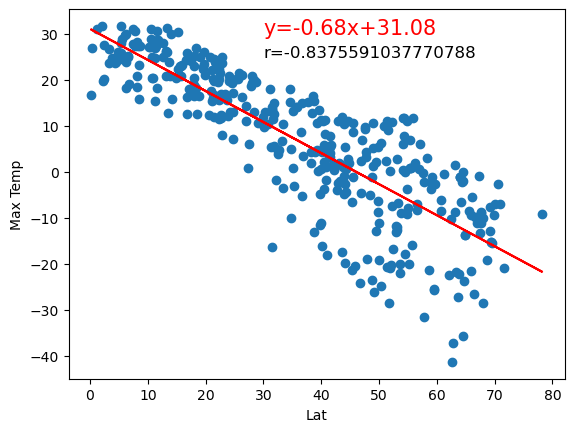

In [46]:
# Linear regression on Northern Hemisphere
plot_linear_regression(x_values,y_values, 'Max Temp', (30,30))
plt.show()


In [51]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

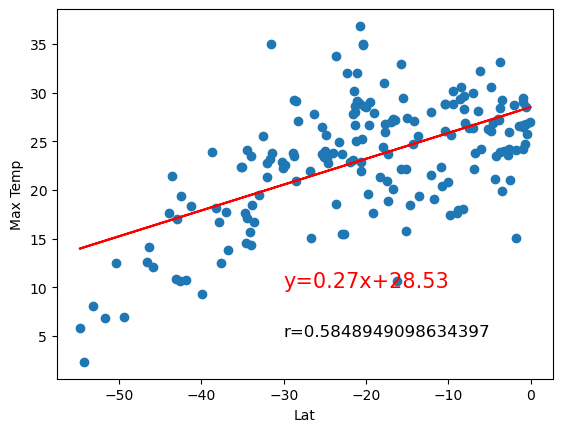

In [53]:
# Linear regression on Southern Hemisphere
plot_linear_regression(x_values, y_values, "Max Temp",(-30,10))
plt.show()


**Discussion about the linear relationship:** I notice a stong coorelation between the temperatures and the Latitude.

### Humidity vs. Latitude Linear Regression Plot

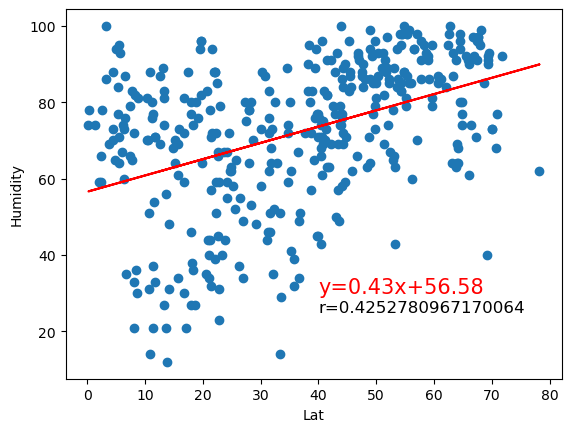

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values,"Humidity",(40,30))          
plt.show()

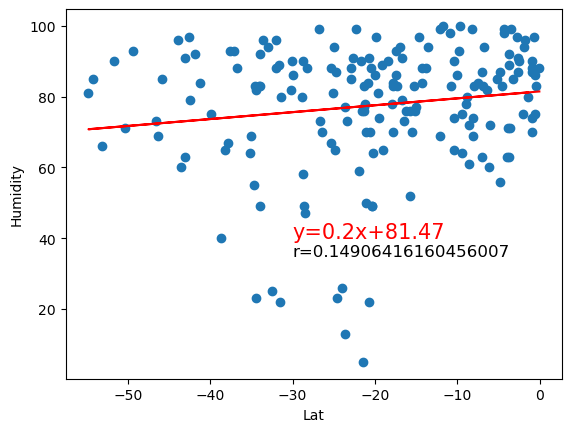

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,"Humidity",(-30,40))
plt.show()


**Discussion about the linear relationship:** I notice a positive coorelation however it seems to be a weak coorelation between latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

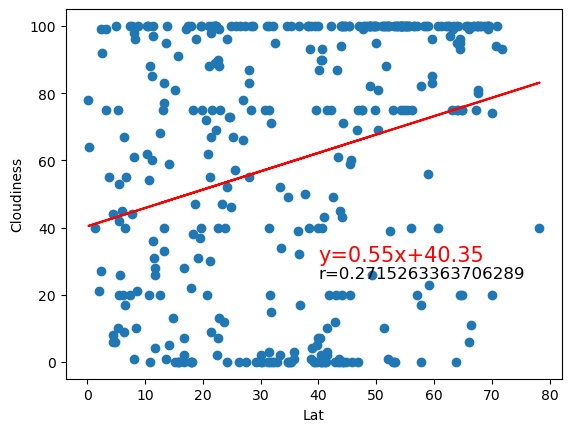

In [58]:
# Northern 'Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,"Cloudiness",(40,30))
plt.show()



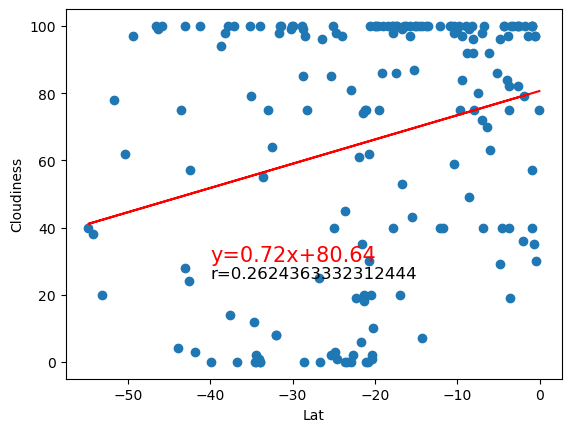

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,"Cloudiness",(-40,30))
plt.show()



**Discussion about the linear relationship:** I notice a very weak coorelation between the latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

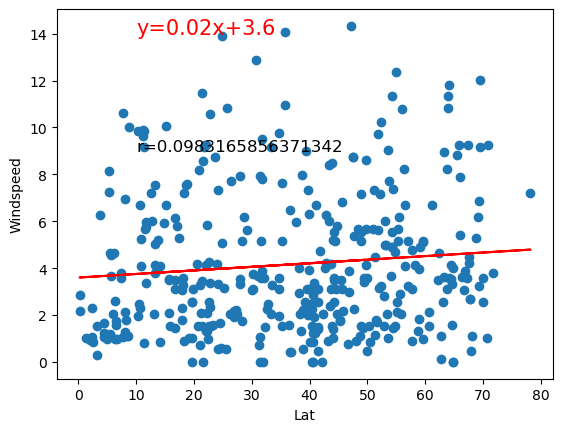

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,"Windspeed",(10,14))
plt.show()


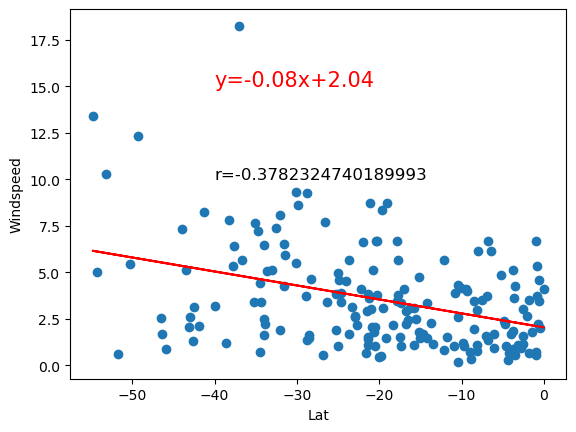

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,"Windspeed",(-40,15.0))
plt.show()



**Discussion about the linear relationship:** I notice a weak coorelation between the latitude and windspeed.